# EDA

First analysis of heating timeseries and some preprocessing

## Importing data

In [3]:
import pandas as pd
df_w = pd.read_csv("DWD_4466_Schleswig.csv", header=5, delimiter=";") #this weather data is not complete. -> use different data
df_h = pd.read_csv("when2heat_DE.csv", header=2, delimiter=";") # mostly focus on this dataset

C:\Users\jabbe\AppData\Local\Temp\ipykernel_1428\3707627667.py:3: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_h = pd.read_csv("when2heat_DE.csv", header=2, delimiter=";") # mostly focus on this dataset


In [4]:
df_h

,attribute,Unnamed: 1,ASHP_floor,ASHP_radiator,ASHP_water,GSHP_floor,GSHP_radiator,GSHP_water,WSHP_floor,WSHP_radiator,...,water,water_COM,water_MFH,water_SFH,space_COM.1,space_MFH.1,space_SFH.1,water_COM.1,water_MFH.1,water_SFH.1
0,unit,NaN,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,coefficient,...,MW,MW,MW,MW,MW/TWh,MW/TWh,MW/TWh,MW/TWh,MW/TWh,MW/TWh
1,2007-12-31T22:00:00Z,2007-12-31T23:00:00,"2,62","3,13","2,23","2,94","3,94","2,19","3,6","4,74",...,3429,1690,1218,521,218,152,174,66,68,12
2,2007-12-31T23:00:00Z,2008-01-01T00:00:00,"2,62","3,13","2,23","2,94","3,94","2,19","3,6","4,74",...,3429,1690,1218,521,218,152,174,66,68,12
3,2008-01-01T00:00:00Z,2008-01-01T01:00:00,"2,61","3,12","2,22","2,92","3,92","2,18","3,59","4,74",...,4015,2127,1263,625,223,159,177,83,70,15
4,2008-01-01T01:00:00Z,2008-01-01T02:00:00,"2,61","3,11","2,22","2,9","3,9","2,17","3,58","4,73",...,3944,2211,1223,509,228,162,183,86,68,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113974,2020-12-31T19:00:00Z,2020-12-31T20:00:00,"2,75","3,24","2,28","3,1","4,06","2,22","3,74","4,83",...,NaN,NaN,NaN,NaN,274.0,283.0,302.0,106.0,137.0,146.0
113975,2020-12-31T20:00:00Z,2020-12-31T21:00:00,"2,74","3,23","2,27","3,08","4,04","2,21","3,73","4,82",...,NaN,NaN,NaN,NaN,257.0,257.0,269.0,97.0,133.0,125.0
113976,2020-12-31T21:00:00Z,2020-12-31T22:00:00,"2,73","3,22","2,27","3,09","4,05","2,22","3,72","4,81",...,NaN,NaN,NaN,NaN,222.0,221.0,198.0,94.0,121.0,73.0
113977,2020-12-31T22:00:00Z,2020-12-31T23:00:00,"2,72","3,21","2,27","3,07","4,04","2,22","3,71","4,81",...,NaN,NaN,NaN,NaN,209.0,161.0,165.0,71.0,90.0,30.0


## Preprocessing

In [5]:
df_total = pd.DataFrame()
df_total.index = pd.to_datetime(df_h.iloc[1:,0].values) # set dateindex  without first row
total = df_h.iloc[1:,15].str.replace(',', '.').astype(float)
df_total["total_heat"] = total.values

In [6]:
df_total

,total_heat
2007-12-31 22:00:00+00:00,95296.0
2007-12-31 23:00:00+00:00,95296.0
2008-01-01 00:00:00+00:00,98086.0
2008-01-01 01:00:00+00:00,100454.0
2008-01-01 02:00:00+00:00,107183.0
...,...
2020-12-31 19:00:00+00:00,NaN
2020-12-31 20:00:00+00:00,NaN
2020-12-31 21:00:00+00:00,NaN
2020-12-31 22:00:00+00:00,NaN


In [7]:
df_total.isna().sum() # one third of the data is missing

total_heat    48443
dtype: int64

In [8]:
df_total.describe() # crazy outliers

,total_heat
count,65535.000000
mean,65679.674022
std,47609.929962
min,3448.000000
25%,23105.500000
50%,56505.000000
75%,97910.500000
max,264244.000000


In [9]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113978 entries, 2007-12-31 22:00:00+00:00 to 2020-12-31 23:00:00+00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_heat  65535 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [10]:
len(pd.date_range(df_total.index[0], df_total.index[-1], freq="h")), df_total.shape #datetindex is complete

(113978, (113978, 1))

<AxesSubplot:>

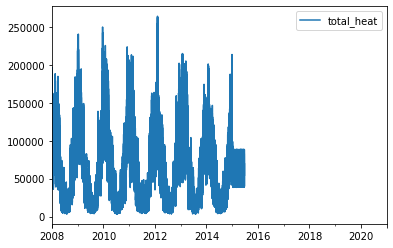

In [17]:
df_total.plot()

<AxesSubplot:>

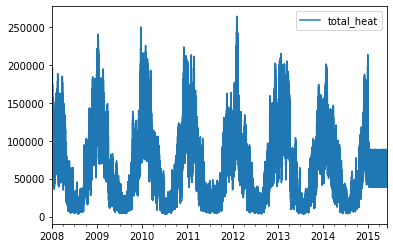

In [11]:
df_total[:"2015-5"].plot() # missing or weird data after 2015

In [12]:
df_slice =  df_total[:"2015-01-01"]

<AxesSubplot:>

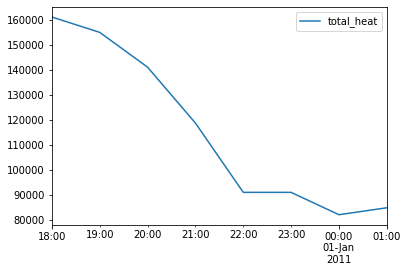

In [13]:
df_slice["2010-12-31 18":"2011-01-01 01"].plot() #outlier?

In [14]:
import numpy as np

In [16]:
df_slice[df_slice["total_heat"]>400000.0]

,total_heat


In [114]:
df_slice.loc[df_slice["total_heat"]>400000.0] = np.NaN

C:\Users\jabbe\AppData\Local\Temp\ipykernel_17004\122262583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice.loc[df_slice["total_heat"]>400000.0] = np.NaN


In [115]:
df_slice.isna().sum()

total_heat    6
dtype: int64

In [116]:
df_interpolated =df_slice.interpolate()

<AxesSubplot:>

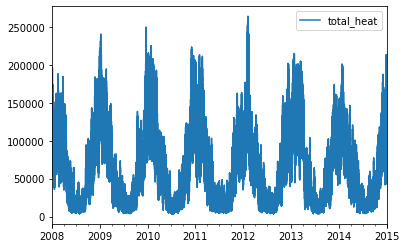

In [117]:
df_interpolated.plot()